In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
file_path = "renttherunway_final_data.json"
data = pd.read_json(file_path, lines=True)

FileNotFoundError: File /Users/zoyahasan/Desktop/CSE 158R/renttherunway_final_data.json does not exist

In [10]:
data.head(5)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [12]:
def clean_weight(weight):
    if isinstance(weight, str):
        return float(weight.replace("lbs", ""))
    return weight

def clean_height(height):
    if isinstance(height, str):
        match = re.match(r"(\d+)' (\d+)\"", height)
        if match:
            feet = int(match.group(1))
            inches = int(match.group(2))
            return feet * 12 + inches
    return height

data["weight"] = data["weight"].apply(clean_weight)
data["height"] = data["height"].apply(clean_height)
data["age"] = pd.to_numeric(data["age"], errors="coerce")

data["weight"].fillna(data["weight"].mean(), inplace=True)
data["bust size"].fillna("Unknown", inplace=True)
data["body type"].fillna("Unknown", inplace=True)

data["review_length"] = data["review_text"].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

data_cleaned = data.drop(columns =["review_date", "age", "rented for", "user_id", "item_id", "review_summary"])
data_cleaned.head(10)

,fit,bust size,weight,rating,review_text,body type,category,height,size,review_length
0,fit,34d,137.000000,10.0,An adorable romper! Belt and zipper were a lit...,hourglass,romper,68.0,14,221
1,fit,34b,132.000000,10.0,I rented this dress for a photo shoot. The the...,straight & narrow,gown,66.0,12,221
2,fit,Unknown,137.391709,10.0,This hugged in all the right places! It was a ...,Unknown,sheath,64.0,4,198
3,fit,34c,135.000000,8.0,I rented this for my company's black tie award...,pear,dress,65.0,8,465
4,fit,34b,145.000000,10.0,I have always been petite in my upper body and...,athletic,gown,69.0,12,559
5,fit,32b,138.000000,8.0,Didn't actually wear it. It fit perfectly. The...,athletic,dress,68.0,8,195
6,fit,34c,112.000000,10.0,This dress is so sweet. I loved the print. The...,hourglass,dress,63.0,4,158
7,fit,34d+,118.000000,10.0,Fit was great. Maybe a little tight under the ...,full bust,dress,63.0,8,52
8,fit,36d,137.391709,10.0,I was nervous of it looking cheap when it arri...,full bust,gown,66.0,21,254
9,fit,32b,114.000000,10.0,The dress was very flattering and fit perfectl...,petite,gown,63.0,1,708


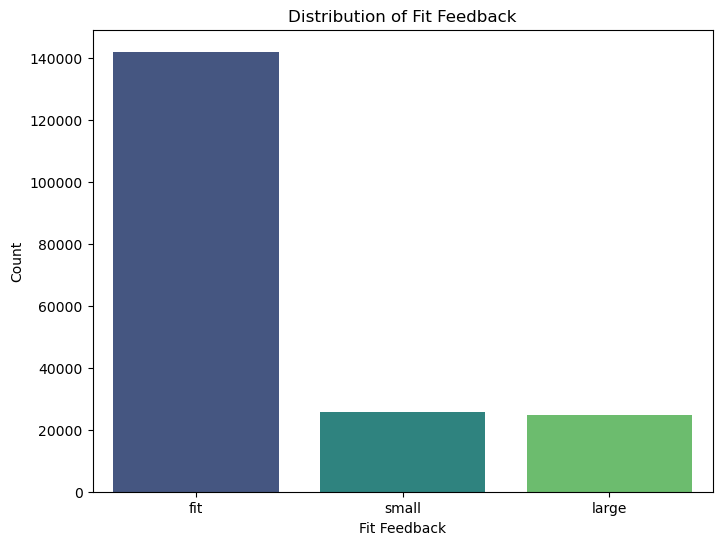

In [14]:
# Distribution of Fit Feedback
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x="fit", palette="viridis")
plt.title("Distribution of Fit Feedback")
plt.xlabel("Fit Feedback")
plt.ylabel("Count")
plt.show()



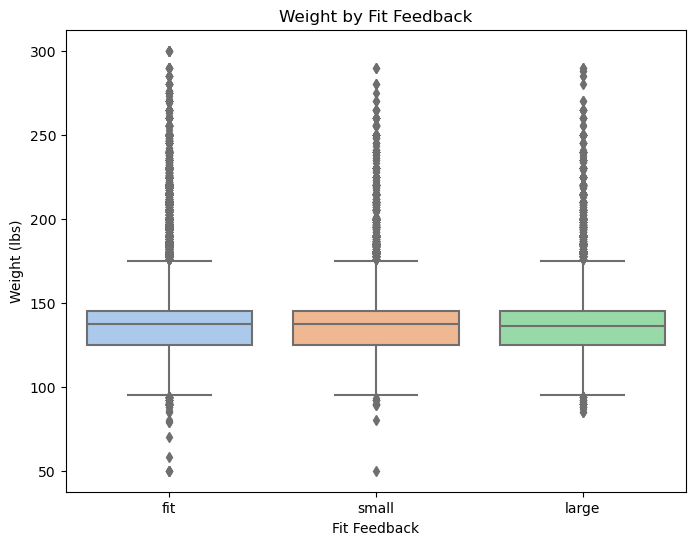

In [15]:
# Weight by Fit Feedback
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x="fit", y="weight", palette="pastel")
plt.title("Weight by Fit Feedback")
plt.xlabel("Fit Feedback")
plt.ylabel("Weight (lbs)")
plt.show()



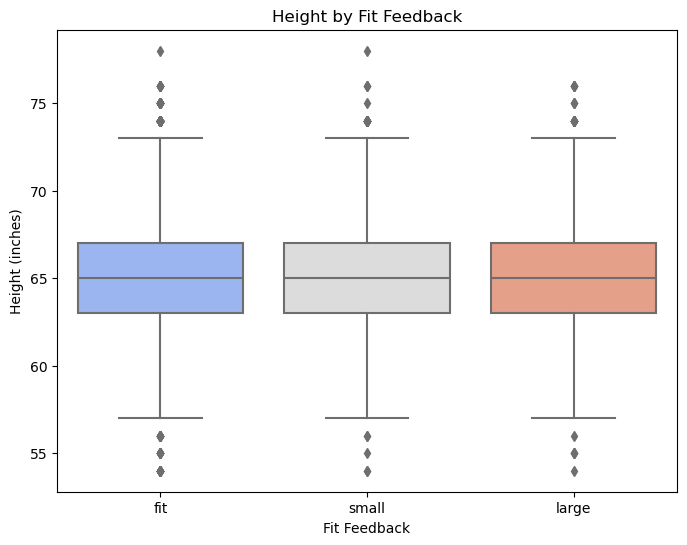

In [16]:
# Height by Fit Feedback
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x="fit", y="height", palette="coolwarm")
plt.title("Height by Fit Feedback")
plt.xlabel("Fit Feedback")
plt.ylabel("Height (inches)")
plt.show()



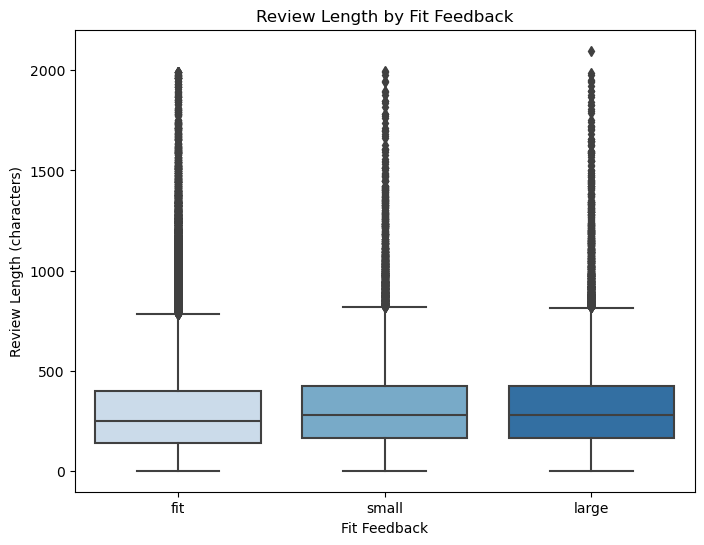

In [17]:
# Review Length by Fit Feedback
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x="fit", y="review_length", palette="Blues")
plt.title("Review Length by Fit Feedback")
plt.xlabel("Fit Feedback")
plt.ylabel("Review Length (characters)")
plt.show()